In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("talk")
sns.set_style("white")

In [9]:
import numpy as np
import torch
import torch.nn as nn
import torch.distributions as dist
from torch.nn import functional as F
import pandas as pd
import math

class CorrelatedPosteriorLogProb(nn.Module):
  """Log probability of a 2D posterior that is a mixture of three Poisson distributions."""
  def __init__(self):
    super().__init__()
    big1 = 9
    big2 = 13
    self.d1 = dist.Poisson(torch.Tensor([0.01, 0.01]))
    self.d2 = dist.Poisson(torch.Tensor([0.01, big1]))
    self.d3 = dist.Poisson(torch.Tensor([big2, 0.01]))
    self.d4 = dist.Poisson(torch.Tensor([big2, big1]))

  def forward(self, z):
    exp_terms = [self.d1.log_prob(z) + math.log(0.25),
                 self.d2.log_prob(z) + math.log(0.25),
                 self.d3.log_prob(z) + math.log(0.25),
                 self.d4.log_prob(z) + math.log(0.25)]
    res = torch.stack(exp_terms)
    return torch.logsumexp(res, dim=0)

In [10]:
log_prob = CorrelatedPosteriorLogProb()

In [17]:
log_prob(torch.Tensor([9, 13]))

tensor([-3.4104, -3.6814])

In [12]:
L = 20
grid = np.zeros((L, L))
for i in range(L):
  for j in range(L):
    grid[i, j] = log_prob(torch.Tensor([i, j])).sum(-1).numpy()
data = pd.DataFrame({j: grid[:, j] for j in range(grid.shape[1])})

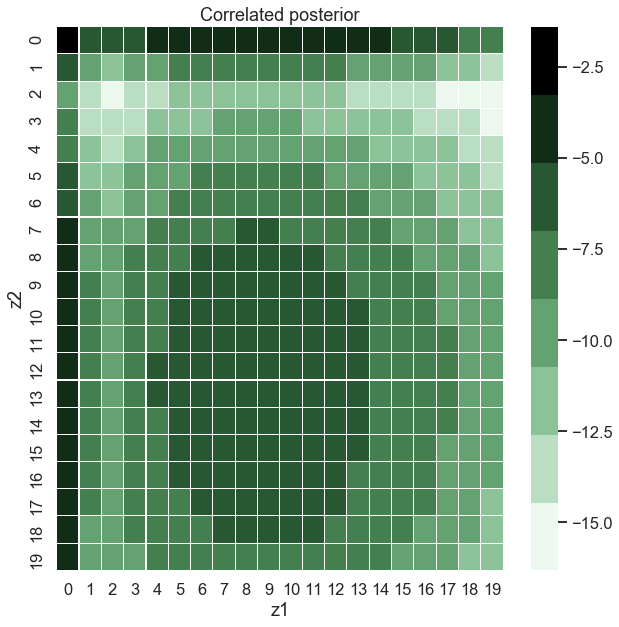

In [13]:
cmap = sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=False)
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data, ax=ax, cmap=cmap, linewidths=0.1) 

ax.set(title='Correlated posterior', xlabel='z1', ylabel='z2')
plt.savefig('log_p_z.png', bbox_inches='tight')